In [88]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import requests
import numpy as np
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

from sklearn.cluster import KMeans
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances

%matplotlib inline
print("Import done!")

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Import done!


In [89]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Prefecture,City,Town,Latitude,Longitude
0,5340000,OSAKA FU,OSAKA SHI MIYAKOJIMA KU IKANIKEISAIGANAIBAAI,IKANIKEISAIGANAIBAAI,NaN,NaN
1,5340026,OSAKA FU,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,AMIJIMACHO,34.709578,135.536833
2,5340013,OSAKA FU,OSAKA SHI MIYAKOJIMA KU UCHINDAICHO,UCHINDAICHO,34.709801,135.522106
3,5340025,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KATAMACHI,KATAMACHI,34.695993,135.528614
4,5340001,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KEMACHO,KEMACHO,34.712973,135.530521


In [90]:
osaka_data = raw_postal[raw_postal['Prefecture'] == 'OSAKA FU']
osaka_data.head()

,Postal Code,Prefecture,City,Town,Latitude,Longitude
0,5340000,OSAKA FU,OSAKA SHI MIYAKOJIMA KU IKANIKEISAIGANAIBAAI,IKANIKEISAIGANAIBAAI,NaN,NaN
1,5340026,OSAKA FU,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,AMIJIMACHO,34.709578,135.536833
2,5340013,OSAKA FU,OSAKA SHI MIYAKOJIMA KU UCHINDAICHO,UCHINDAICHO,34.709801,135.522106
3,5340025,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KATAMACHI,KATAMACHI,34.695993,135.528614
4,5340001,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KEMACHO,KEMACHO,34.712973,135.530521


In [91]:
osaka_data = osaka_data.drop(osaka_data[osaka_data.Town == 'IKANIKEISAIGANAIBAAI'].index)
osaka_data.head()

,Postal Code,Prefecture,City,Town,Latitude,Longitude
1,5340026,OSAKA FU,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,AMIJIMACHO,34.709578,135.536833
2,5340013,OSAKA FU,OSAKA SHI MIYAKOJIMA KU UCHINDAICHO,UCHINDAICHO,34.709801,135.522106
3,5340025,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KATAMACHI,KATAMACHI,34.695993,135.528614
4,5340001,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KEMACHO,KEMACHO,34.712973,135.530521
5,5340015,OSAKA FU,OSAKA SHI MIYAKOJIMA KU ZENGENJICHO,ZENGENJICHO,34.717516,135.526018


In [92]:
osaka_data.shape

(583, 6)

In [93]:
osaka_data = osaka_data.dropna(how='any')

In [94]:
osaka_data.shape

(489, 6)

In [95]:
osaka_data.reset_index(inplace=True)
osaka_data.head()

,index,Postal Code,Prefecture,City,Town,Latitude,Longitude
0,1,5340026,OSAKA FU,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,AMIJIMACHO,34.709578,135.536833
1,2,5340013,OSAKA FU,OSAKA SHI MIYAKOJIMA KU UCHINDAICHO,UCHINDAICHO,34.709801,135.522106
2,3,5340025,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KATAMACHI,KATAMACHI,34.695993,135.528614
3,4,5340001,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KEMACHO,KEMACHO,34.712973,135.530521
4,5,5340015,OSAKA FU,OSAKA SHI MIYAKOJIMA KU ZENGENJICHO,ZENGENJICHO,34.717516,135.526018


In [96]:
osaka_data.drop('index',1,inplace=True)

In [98]:
osaka_data.head()

,Postal Code,Prefecture,City,Town,Latitude,Longitude
0,5340026,OSAKA FU,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,AMIJIMACHO,34.709578,135.536833
1,5340013,OSAKA FU,OSAKA SHI MIYAKOJIMA KU UCHINDAICHO,UCHINDAICHO,34.709801,135.522106
2,5340025,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KATAMACHI,KATAMACHI,34.695993,135.528614
3,5340001,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KEMACHO,KEMACHO,34.712973,135.530521
4,5340015,OSAKA FU,OSAKA SHI MIYAKOJIMA KU ZENGENJICHO,ZENGENJICHO,34.717516,135.526018


In [99]:
# Use geopy library to get the latitude and longitude values of OSAKA FU OSAKA SHI
address = 'OSAKA FU OSAKA SHI'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of OSAKA FU OSAKA SHI are 34.6937569, 135.5014539.


In [100]:
# create map of Toronto using latitude and longitude values
map_Osaka = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(osaka_data['Latitude'], osaka_data['Longitude'], osaka_data['Town']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Osaka)  
    
map_Osaka

In [101]:
CLIENT_ID = 'YPBVFDUZOP1M24BKCWGXIYZ3RFACOE3V35WSFY4DSCMRU44L' # your Foursquare ID
CLIENT_SECRET = 'VYHYTBSRIZBPYAOCP5ZEFV3YM4C40YEQCQWCUO4NC1JTPNJM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YPBVFDUZOP1M24BKCWGXIYZ3RFACOE3V35WSFY4DSCMRU44L
CLIENT_SECRET:VYHYTBSRIZBPYAOCP5ZEFV3YM4C40YEQCQWCUO4NC1JTPNJM


In [102]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            print ("Remove failure: " + name)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [103]:
LIMIT = 100
radius=500
Osaka_venues = getNearbyVenues(names=osaka_data['City'],
                                   latitudes=osaka_data['Latitude'],
                                   longitudes=osaka_data['Longitude']
                                  )


OSAKA SHI MIYAKOJIMA KU AMIJIMACHO
OSAKA SHI MIYAKOJIMA KU UCHINDAICHO
OSAKA SHI MIYAKOJIMA KU KATAMACHI
OSAKA SHI MIYAKOJIMA KU KEMACHO
OSAKA SHI MIYAKOJIMA KU ZENGENJICHO
OSAKA SHI MIYAKOJIMA KU DAITOCHO
OSAKA SHI MIYAKOJIMA KU TAKAKURACHO
OSAKA SHI MIYAKOJIMA KU TOMOBUCHICHO
OSAKA SHI MIYAKOJIMA KU NAKANOCHO
OSAKA SHI MIYAKOJIMA KU HIGASHINODAMACHI
OSAKA SHI MIYAKOJIMA KU MIYAKOJIMANAKADORI
OSAKA SHI MIYAKOJIMA KU MIYAKOJIMAHONDORI
OSAKA SHI MIYAKOJIMA KU MIYAKOJIMAMINAMIDORI
OSAKA SHI MIYAKOJIMA KU MIYAKOJIMAKITADORI
OSAKA SHI FUKUSHIMA KU EBIE
OSAKA SHI FUKUSHIMA KU OHIRAKI
OSAKA SHI FUKUSHIMA KU SAGISU
OSAKA SHI FUKUSHIMA KU TAMAGAWA
OSAKA SHI FUKUSHIMA KU NODA
OSAKA SHI FUKUSHIMA KU FUKUSHIMA
OSAKA SHI FUKUSHIMA KU YOSHINO
OSAKA SHI KONOHANA KU ASAHI
OSAKA SHI KONOHANA KU UMEMACHI
OSAKA SHI KONOHANA KU KASUGADENAKA
OSAKA SHI KONOHANA KU KASUGADEMINAMI
OSAKA SHI KONOHANA KU KASUGADEKITA
OSAKA SHI KONOHANA KU SAKURAJIMA
OSAKA SHI KONOHANA KU SHIKANJIMA
OSAKA SHI KONOHANA KU SHIMAY

In [104]:
Osaka_venues.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [105]:
Osaka_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,34.709578,135.536833,薩摩の久保,34.708494,135.535882,BBQ Joint
1,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,34.709578,135.536833,ひのき屋,34.711323,135.540678,Ramen Restaurant
2,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,34.709578,135.536833,阪急オアシス 高殿店,34.712034,135.541123,Grocery Store
3,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,34.709578,135.536833,7-Eleven (セブンイレブン 大阪野江3丁目店),34.708227,135.536709,Convenience Store
4,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,34.709578,135.536833,FamilyMart (ファミリーマート 内代町二丁目店),34.711716,135.535031,Convenience Store


In [106]:
# Check Count of Venues for Each Neighbourhood
Osaka_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
OSAKA SHI ABENO KU ABENOMOTOMACHI,15,15,15,15,15,15
OSAKA SHI ABENO KU ABENOSUJI (TSUGINOBIRUONOZOKU),29,29,29,29,29,29
OSAKA SHI ABENO KU AIOIDORI,30,30,30,30,30,30
OSAKA SHI ABENO KU ASAHIMACHI,81,81,81,81,81,81
OSAKA SHI ABENO KU BANDAI,47,47,47,47,47,47
OSAKA SHI ABENO KU FUMINOSATO,19,19,19,19,19,19
OSAKA SHI ABENO KU HANNANCHO,8,8,8,8,8,8
OSAKA SHI ABENO KU HARIMACHO,82,82,82,82,82,82
OSAKA SHI ABENO KU HASHIMOTOCHO,13,13,13,13,13,13


In [108]:
# Get the List of Unique Categories
print('There are {} venues in {} uniques categories.'.format(Osaka_venues['Neighborhood'].count(),len(Osaka_venues['Venue Category'].unique())))

There are 16028 venues in 310 uniques categories.


In [109]:
# one hot encoding
venues_onehot = pd.get_dummies(Osaka_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = Osaka_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
#fixed_columns
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Zoo Exhibit,ATM,Adult Boutique,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
Osaka_grouped = venues_onehot.groupby('Neighborhood').mean().reset_index()
Osaka_grouped

,Neighborhood,Zoo Exhibit,ATM,Adult Boutique,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo
0,OSAKA SHI ABENO KU ABENOMOTOMACHI,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,OSAKA SHI ABENO KU ABENOSUJI (TSUGINOBIRUONOZOKU),0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,OSAKA SHI ABENO KU AIOIDORI,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.000000,0.000000,0.0
3,OSAKA SHI ABENO KU ASAHIMACHI,0.0,0.0,0.0,0.000000,0.0,0.037037,0.0,0.012346,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,OSAKA SHI ABENO KU BANDAI,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
5,OSAKA SHI ABENO KU FUMINOSATO,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
6,OSAKA SHI ABENO KU HANNANCHO,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
7,OSAKA SHI ABENO KU HARIMACHO,0.0,0.0,0.0,0.000000,0.0,0.012195,0.0,0.012195,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.012195,0.012195,0.012195,0.0
8,OSAKA SHI ABENO KU HASHIMOTOCHO,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
9,OSAKA SHI ABENO KU KITABATAKE,0.0,0.0,0.0,0.000000,0.0,0.142857,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.142857,0.000000,0.0


In [111]:
Osaka_grouped.shape

(487, 310)

## List frequency of top 10 venues in each neighbourhood

In [112]:
num_top_venues = 10

for hood in Osaka_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Osaka_grouped[Osaka_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----OSAKA SHI ABENO KU ABENOMOTOMACHI----
                 venue  freq
0    Convenience Store  0.20
1        Shopping Mall  0.13
2  Japanese Restaurant  0.07
3            Bike Shop  0.07
4     Ramen Restaurant  0.07
5         Noodle House  0.07
6               Shrine  0.07
7        Train Station  0.07
8       Discount Store  0.07
9                 Park  0.07


----OSAKA SHI ABENO KU ABENOSUJI (TSUGINOBIRUONOZOKU)----
                venue  freq
0   Convenience Store  0.14
1        Dessert Shop  0.07
2              Bakery  0.07
3                Café  0.07
4       Train Station  0.07
5                Park  0.03
6            Gym Pool  0.03
7  Tempura Restaurant  0.03
8            Pharmacy  0.03
9  Chinese Restaurant  0.03


----OSAKA SHI ABENO KU AIOIDORI----
                    venue  freq
0       Convenience Store  0.13
1                    Park  0.10
2            Intersection  0.10
3           Train Station  0.07
4     Japanese Restaurant  0.07
5                Sake Bar  0.03
6        

In [113]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

## Top 10 venues of each neighbourhood

In [114]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Osaka_grouped['Neighborhood']

for ind in np.arange(Osaka_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Osaka_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,OSAKA SHI ABENO KU ABENOMOTOMACHI,Convenience Store,Shopping Mall,Japanese Restaurant,Train Station,Korean Restaurant,Noodle House,Shrine,Supermarket,Discount Store,Bike Shop
1,OSAKA SHI ABENO KU ABENOSUJI (TSUGINOBIRUONOZOKU),Convenience Store,Dessert Shop,Train Station,Café,Bakery,BBQ Joint,Food,Chinese Restaurant,Gym Pool,Fast Food Restaurant
2,OSAKA SHI ABENO KU AIOIDORI,Convenience Store,Intersection,Park,Japanese Restaurant,Train Station,Fast Food Restaurant,Restaurant,Italian Restaurant,Farmers Market,Bus Stop
3,OSAKA SHI ABENO KU ASAHIMACHI,Shopping Mall,Convenience Store,Sake Bar,Hotel,Kushikatsu Restaurant,Ramen Restaurant,Arcade,Donburi Restaurant,Café,Grocery Store
4,OSAKA SHI ABENO KU BANDAI,Convenience Store,Japanese Restaurant,Ramen Restaurant,Noodle House,Café,BBQ Joint,Grocery Store,Donburi Restaurant,Sake Bar,Playground


In [115]:
neighborhoods_venues_sorted.shape

(487, 11)

In [116]:
neighborhoods_venues_sorted['Neighbourhood']=neighborhoods_venues_sorted['Neighborhood']
neighborhoods_venues_sorted.drop('Neighborhood',1,inplace=True)
neighborhoods_venues_sorted

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighbourhood
0,Convenience Store,Shopping Mall,Japanese Restaurant,Train Station,Korean Restaurant,Noodle House,Shrine,Supermarket,Discount Store,Bike Shop,OSAKA SHI ABENO KU ABENOMOTOMACHI
1,Convenience Store,Dessert Shop,Train Station,Café,Bakery,BBQ Joint,Food,Chinese Restaurant,Gym Pool,Fast Food Restaurant,OSAKA SHI ABENO KU ABENOSUJI (TSUGINOBIRUONOZOKU)
2,Convenience Store,Intersection,Park,Japanese Restaurant,Train Station,Fast Food Restaurant,Restaurant,Italian Restaurant,Farmers Market,Bus Stop,OSAKA SHI ABENO KU AIOIDORI
3,Shopping Mall,Convenience Store,Sake Bar,Hotel,Kushikatsu Restaurant,Ramen Restaurant,Arcade,Donburi Restaurant,Café,Grocery Store,OSAKA SHI ABENO KU ASAHIMACHI
4,Convenience Store,Japanese Restaurant,Ramen Restaurant,Noodle House,Café,BBQ Joint,Grocery Store,Donburi Restaurant,Sake Bar,Playground,OSAKA SHI ABENO KU BANDAI
5,Café,Intersection,Bakery,Restaurant,BBQ Joint,Sushi Restaurant,Park,Gym Pool,Pharmacy,Shopping Mall,OSAKA SHI ABENO KU FUMINOSATO
6,Park,BBQ Joint,Korean Restaurant,Discount Store,Donut Shop,Intersection,Bakery,Shrine,Flower Shop,Food,OSAKA SHI ABENO KU HANNANCHO
7,Convenience Store,Coffee Shop,Sake Bar,Café,Italian Restaurant,Hotel,Restaurant,Shopping Mall,Dessert Shop,Ramen Restaurant,OSAKA SHI ABENO KU HARIMACHO
8,Convenience Store,Supermarket,Sushi Restaurant,Restaurant,Café,Tempura Restaurant,Food,Grocery Store,Pharmacy,Gym Pool,OSAKA SHI ABENO KU HASHIMOTOCHO
9,Convenience Store,Yakitori Restaurant,Japanese Restaurant,Arcade,Ramen Restaurant,Zoo,Food Stand,Fishing Store,Flea Market,Flower Shop,OSAKA SHI ABENO KU KITABATAKE


In [117]:
cols = neighborhoods_venues_sorted.columns.tolist()
cols = cols[-1:] + cols[:-1]
neighborhoods_venues_sorted = neighborhoods_venues_sorted[cols]
neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,OSAKA SHI ABENO KU ABENOMOTOMACHI,Convenience Store,Shopping Mall,Japanese Restaurant,Train Station,Korean Restaurant,Noodle House,Shrine,Supermarket,Discount Store,Bike Shop
1,OSAKA SHI ABENO KU ABENOSUJI (TSUGINOBIRUONOZOKU),Convenience Store,Dessert Shop,Train Station,Café,Bakery,BBQ Joint,Food,Chinese Restaurant,Gym Pool,Fast Food Restaurant
2,OSAKA SHI ABENO KU AIOIDORI,Convenience Store,Intersection,Park,Japanese Restaurant,Train Station,Fast Food Restaurant,Restaurant,Italian Restaurant,Farmers Market,Bus Stop
3,OSAKA SHI ABENO KU ASAHIMACHI,Shopping Mall,Convenience Store,Sake Bar,Hotel,Kushikatsu Restaurant,Ramen Restaurant,Arcade,Donburi Restaurant,Café,Grocery Store
4,OSAKA SHI ABENO KU BANDAI,Convenience Store,Japanese Restaurant,Ramen Restaurant,Noodle House,Café,BBQ Joint,Grocery Store,Donburi Restaurant,Sake Bar,Playground
5,OSAKA SHI ABENO KU FUMINOSATO,Café,Intersection,Bakery,Restaurant,BBQ Joint,Sushi Restaurant,Park,Gym Pool,Pharmacy,Shopping Mall
6,OSAKA SHI ABENO KU HANNANCHO,Park,BBQ Joint,Korean Restaurant,Discount Store,Donut Shop,Intersection,Bakery,Shrine,Flower Shop,Food
7,OSAKA SHI ABENO KU HARIMACHO,Convenience Store,Coffee Shop,Sake Bar,Café,Italian Restaurant,Hotel,Restaurant,Shopping Mall,Dessert Shop,Ramen Restaurant
8,OSAKA SHI ABENO KU HASHIMOTOCHO,Convenience Store,Supermarket,Sushi Restaurant,Restaurant,Café,Tempura Restaurant,Food,Grocery Store,Pharmacy,Gym Pool
9,OSAKA SHI ABENO KU KITABATAKE,Convenience Store,Yakitori Restaurant,Japanese Restaurant,Arcade,Ramen Restaurant,Zoo,Food Stand,Fishing Store,Flea Market,Flower Shop


## KMeans Clustering of Neighbourhoods

In [118]:
Osaka_grouped

,Neighborhood,Zoo Exhibit,ATM,Adult Boutique,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo
0,OSAKA SHI ABENO KU ABENOMOTOMACHI,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,OSAKA SHI ABENO KU ABENOSUJI (TSUGINOBIRUONOZOKU),0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,OSAKA SHI ABENO KU AIOIDORI,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.000000,0.000000,0.0
3,OSAKA SHI ABENO KU ASAHIMACHI,0.0,0.0,0.0,0.000000,0.0,0.037037,0.0,0.012346,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,OSAKA SHI ABENO KU BANDAI,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
5,OSAKA SHI ABENO KU FUMINOSATO,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
6,OSAKA SHI ABENO KU HANNANCHO,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
7,OSAKA SHI ABENO KU HARIMACHO,0.0,0.0,0.0,0.000000,0.0,0.012195,0.0,0.012195,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.012195,0.012195,0.012195,0.0
8,OSAKA SHI ABENO KU HASHIMOTOCHO,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
9,OSAKA SHI ABENO KU KITABATAKE,0.0,0.0,0.0,0.000000,0.0,0.142857,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.142857,0.000000,0.0


In [119]:
Osaka_grouped_clustering = Osaka_grouped.drop('Neighborhood', 1)
Osaka_grouped_clustering

,Zoo Exhibit,ATM,Adult Boutique,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Waterfront,Well,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yakitori Restaurant,Yoshoku Restaurant,Zoo
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.033333,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.033333,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.037037,0.0,0.012346,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.012195,0.0,0.012195,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.012195,0.012195,0.012195,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.142857,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.142857,0.000000,0.0


maximum is 0.13308787264907748, which occurs at k=2


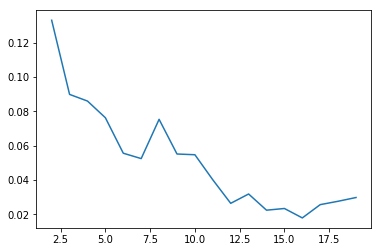

In [136]:
START = 2
END = 20
scores = []
for k in range(START, END):
    # run k-means clustering, but drop the first column (buurtcode)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(Osaka_grouped_clustering)
    
    scores.append(metrics.silhouette_score(Osaka_grouped_clustering, kmeans.labels_))   
print( "maximum is {}, which occurs at k={}".format(np.max(scores),np.argmax(scores)+START))
kclusters=np.argmax(scores)+START
plt.plot(range(START,END),scores)

In [137]:
kclusters = 8
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Osaka_grouped_clustering)

In [138]:
neighborhoods_venues_sorted['Cluster label'] = kmeans.labels_
neighborhoods_venues_sorted.rename(columns={'Neighbourhood':'City'}, inplace=True)
neighborhoods_venues_sorted

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
0,OSAKA SHI ABENO KU ABENOMOTOMACHI,Convenience Store,Shopping Mall,Japanese Restaurant,Train Station,Korean Restaurant,Noodle House,Shrine,Supermarket,Discount Store,Bike Shop,2
1,OSAKA SHI ABENO KU ABENOSUJI (TSUGINOBIRUONOZOKU),Convenience Store,Dessert Shop,Train Station,Café,Bakery,BBQ Joint,Food,Chinese Restaurant,Gym Pool,Fast Food Restaurant,2
2,OSAKA SHI ABENO KU AIOIDORI,Convenience Store,Intersection,Park,Japanese Restaurant,Train Station,Fast Food Restaurant,Restaurant,Italian Restaurant,Farmers Market,Bus Stop,0
3,OSAKA SHI ABENO KU ASAHIMACHI,Shopping Mall,Convenience Store,Sake Bar,Hotel,Kushikatsu Restaurant,Ramen Restaurant,Arcade,Donburi Restaurant,Café,Grocery Store,1
4,OSAKA SHI ABENO KU BANDAI,Convenience Store,Japanese Restaurant,Ramen Restaurant,Noodle House,Café,BBQ Joint,Grocery Store,Donburi Restaurant,Sake Bar,Playground,2
5,OSAKA SHI ABENO KU FUMINOSATO,Café,Intersection,Bakery,Restaurant,BBQ Joint,Sushi Restaurant,Park,Gym Pool,Pharmacy,Shopping Mall,1
6,OSAKA SHI ABENO KU HANNANCHO,Park,BBQ Joint,Korean Restaurant,Discount Store,Donut Shop,Intersection,Bakery,Shrine,Flower Shop,Food,1
7,OSAKA SHI ABENO KU HARIMACHO,Convenience Store,Coffee Shop,Sake Bar,Café,Italian Restaurant,Hotel,Restaurant,Shopping Mall,Dessert Shop,Ramen Restaurant,2
8,OSAKA SHI ABENO KU HASHIMOTOCHO,Convenience Store,Supermarket,Sushi Restaurant,Restaurant,Café,Tempura Restaurant,Food,Grocery Store,Pharmacy,Gym Pool,2
9,OSAKA SHI ABENO KU KITABATAKE,Convenience Store,Yakitori Restaurant,Japanese Restaurant,Arcade,Ramen Restaurant,Zoo,Food Stand,Fishing Store,Flea Market,Flower Shop,6


In [139]:
df_ehv_clusters = pd.merge( osaka_data, neighborhoods_venues_sorted, how='left',
        on=['City'])
df_ehv_clusters.head()

,Postal Code,Prefecture,City,Town,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
0,5340026,OSAKA FU,OSAKA SHI MIYAKOJIMA KU AMIJIMACHO,AMIJIMACHO,34.709578,135.536833,Convenience Store,Grocery Store,Chinese Restaurant,Furniture / Home Store,Pharmacy,Supermarket,Shopping Mall,Park,Ramen Restaurant,BBQ Joint,0.0
1,5340013,OSAKA FU,OSAKA SHI MIYAKOJIMA KU UCHINDAICHO,UCHINDAICHO,34.709801,135.522106,Convenience Store,Park,Donburi Restaurant,Italian Restaurant,Intersection,Fast Food Restaurant,Ramen Restaurant,Chinese Restaurant,Video Store,Café,0.0
2,5340025,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KATAMACHI,KATAMACHI,34.695993,135.528614,Convenience Store,BBQ Joint,Chinese Restaurant,Sake Bar,Hotel,Italian Restaurant,Coffee Shop,Restaurant,Ramen Restaurant,Discount Store,1.0
3,5340001,OSAKA FU,OSAKA SHI MIYAKOJIMA KU KEMACHO,KEMACHO,34.712973,135.530521,Convenience Store,Supermarket,Japanese Restaurant,Clothing Store,Bakery,Drugstore,Café,Gym,Fast Food Restaurant,Noodle House,6.0
4,5340015,OSAKA FU,OSAKA SHI MIYAKOJIMA KU ZENGENJICHO,ZENGENJICHO,34.717516,135.526018,Convenience Store,Clothing Store,Bus Stop,Park,Ramen Restaurant,Bakery,Fried Chicken Joint,Supermarket,Bus Station,Noodle House,2.0


## Find which cluster does TSURUMIKU IMAZUMINAMI belong to

In [140]:
df_ehv_clusters[df_ehv_clusters['Town']=='IMAZUMINAMI']

,Postal Code,Prefecture,City,Town,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
337,5380043,OSAKA FU,OSAKA SHI TSURUMI KU IMAZUMINAMI,IMAZUMINAMI,34.689036,135.567842,Convenience Store,Ramen Restaurant,Sake Bar,Okonomiyaki Restaurant,Noodle House,Grocery Store,Train Station,Fast Food Restaurant,Platform,Chinese Restaurant,2.0


In [141]:
# Now we get all neighbourhoods in cluster 2.0
neigh_candidates = df_ehv_clusters.loc[(df_ehv_clusters['Cluster label'] == 2.0)]
neigh_candidates

,Postal Code,Prefecture,City,Town,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
4,5340015,OSAKA FU,OSAKA SHI MIYAKOJIMA KU ZENGENJICHO,ZENGENJICHO,34.717516,135.526018,Convenience Store,Clothing Store,Bus Stop,Park,Ramen Restaurant,Bakery,Fried Chicken Joint,Supermarket,Bus Station,Noodle House,2.0
5,5340002,OSAKA FU,OSAKA SHI MIYAKOJIMA KU DAITOCHO,DAITOCHO,34.713199,135.534003,Convenience Store,Supermarket,Japanese Restaurant,Italian Restaurant,Clothing Store,Furniture / Home Store,Pharmacy,Café,Fast Food Restaurant,Park,2.0
7,5340016,OSAKA FU,OSAKA SHI MIYAKOJIMA KU TOMOBUCHICHO,TOMOBUCHICHO,34.699626,135.523588,Convenience Store,Restaurant,Bridal Shop,Bus Stop,Business Center,Okonomiyaki Restaurant,Golf Driving Range,Café,Park,Museum,2.0
8,5340027,OSAKA FU,OSAKA SHI MIYAKOJIMA KU NAKANOCHO,NAKANOCHO,34.723230,135.529485,Convenience Store,Chinese Restaurant,Bus Stop,Shabu-Shabu Restaurant,Grocery Store,Sushi Restaurant,Shopping Mall,Drugstore,BBQ Joint,Shipping Store,2.0
9,5340024,OSAKA FU,OSAKA SHI MIYAKOJIMA KU HIGASHINODAMACHI,HIGASHINODAMACHI,34.710871,135.524320,Convenience Store,Park,Donburi Restaurant,Japanese Restaurant,Dessert Shop,Café,Chinese Restaurant,Sake Bar,Fast Food Restaurant,Liquor Store,2.0
14,5530001,OSAKA FU,OSAKA SHI FUKUSHIMA KU EBIE,EBIE,34.698254,135.475745,Convenience Store,Japanese Restaurant,Supermarket,Park,Fast Food Restaurant,Chinese Restaurant,Bookstore,Okonomiyaki Restaurant,Steakhouse,Spa,2.0
15,5530007,OSAKA FU,OSAKA SHI FUKUSHIMA KU OHIRAKI,OHIRAKI,34.695039,135.479289,Convenience Store,Japanese Restaurant,Chinese Restaurant,Supermarket,Café,Fast Food Restaurant,Shopping Mall,Japanese Curry Restaurant,Bookstore,Takoyaki Place,2.0
16,5530002,OSAKA FU,OSAKA SHI FUKUSHIMA KU SAGISU,SAGISU,34.688522,135.482185,Convenience Store,Hotel,Café,Intersection,Train Station,Coffee Shop,Bar,Concert Hall,Seafood Restaurant,BBQ Joint,2.0
17,5530004,OSAKA FU,OSAKA SHI FUKUSHIMA KU TAMAGAWA,TAMAGAWA,34.694657,135.489037,Convenience Store,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Sake Bar,Café,Bakery,Hostel,Udon Restaurant,Train Station,2.0
18,5530005,OSAKA FU,OSAKA SHI FUKUSHIMA KU NODA,NODA,34.692660,135.478184,Convenience Store,Japanese Restaurant,Fast Food Restaurant,Donburi Restaurant,Chinese Restaurant,Intersection,Ramen Restaurant,Supermarket,Train Station,Shopping Mall,2.0


## Create map of target neighbourhoods

In [143]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neigh_candidates['Latitude'], neigh_candidates['Longitude'], neigh_candidates['Town'], neigh_candidates['Cluster label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [144]:
neigh_candidates.reset_index(drop=True,inplace=True)
neigh_candidates

,Postal Code,Prefecture,City,Town,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
0,5340015,OSAKA FU,OSAKA SHI MIYAKOJIMA KU ZENGENJICHO,ZENGENJICHO,34.717516,135.526018,Convenience Store,Clothing Store,Bus Stop,Park,Ramen Restaurant,Bakery,Fried Chicken Joint,Supermarket,Bus Station,Noodle House,2.0
1,5340002,OSAKA FU,OSAKA SHI MIYAKOJIMA KU DAITOCHO,DAITOCHO,34.713199,135.534003,Convenience Store,Supermarket,Japanese Restaurant,Italian Restaurant,Clothing Store,Furniture / Home Store,Pharmacy,Café,Fast Food Restaurant,Park,2.0
2,5340016,OSAKA FU,OSAKA SHI MIYAKOJIMA KU TOMOBUCHICHO,TOMOBUCHICHO,34.699626,135.523588,Convenience Store,Restaurant,Bridal Shop,Bus Stop,Business Center,Okonomiyaki Restaurant,Golf Driving Range,Café,Park,Museum,2.0
3,5340027,OSAKA FU,OSAKA SHI MIYAKOJIMA KU NAKANOCHO,NAKANOCHO,34.723230,135.529485,Convenience Store,Chinese Restaurant,Bus Stop,Shabu-Shabu Restaurant,Grocery Store,Sushi Restaurant,Shopping Mall,Drugstore,BBQ Joint,Shipping Store,2.0
4,5340024,OSAKA FU,OSAKA SHI MIYAKOJIMA KU HIGASHINODAMACHI,HIGASHINODAMACHI,34.710871,135.524320,Convenience Store,Park,Donburi Restaurant,Japanese Restaurant,Dessert Shop,Café,Chinese Restaurant,Sake Bar,Fast Food Restaurant,Liquor Store,2.0
5,5530001,OSAKA FU,OSAKA SHI FUKUSHIMA KU EBIE,EBIE,34.698254,135.475745,Convenience Store,Japanese Restaurant,Supermarket,Park,Fast Food Restaurant,Chinese Restaurant,Bookstore,Okonomiyaki Restaurant,Steakhouse,Spa,2.0
6,5530007,OSAKA FU,OSAKA SHI FUKUSHIMA KU OHIRAKI,OHIRAKI,34.695039,135.479289,Convenience Store,Japanese Restaurant,Chinese Restaurant,Supermarket,Café,Fast Food Restaurant,Shopping Mall,Japanese Curry Restaurant,Bookstore,Takoyaki Place,2.0
7,5530002,OSAKA FU,OSAKA SHI FUKUSHIMA KU SAGISU,SAGISU,34.688522,135.482185,Convenience Store,Hotel,Café,Intersection,Train Station,Coffee Shop,Bar,Concert Hall,Seafood Restaurant,BBQ Joint,2.0
8,5530004,OSAKA FU,OSAKA SHI FUKUSHIMA KU TAMAGAWA,TAMAGAWA,34.694657,135.489037,Convenience Store,Ramen Restaurant,Japanese Restaurant,Chinese Restaurant,Sake Bar,Café,Bakery,Hostel,Udon Restaurant,Train Station,2.0
9,5530005,OSAKA FU,OSAKA SHI FUKUSHIMA KU NODA,NODA,34.692660,135.478184,Convenience Store,Japanese Restaurant,Fast Food Restaurant,Donburi Restaurant,Chinese Restaurant,Intersection,Ramen Restaurant,Supermarket,Train Station,Shopping Mall,2.0


In [145]:
neigh_candidates.columns

Index(['Postal Code', 'Prefecture', 'City', 'Town', 'Latitude', 'Longitude',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue', 'Cluster label'],
      dtype='object')

## Looking for Vietnamese restaurants and grocery store

In [158]:
vietnamese_restaurant = neigh_candidates[neigh_candidates[['1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']] == 'Vietnamese Restaurant']

In [159]:
vietnamese_restaurant = vietnamese_restaurant.dropna(how='all')
vietnamese_restaurant

,Postal Code,Prefecture,City,Town,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label


### No Vietnamese restaurant?? WTF??

Try Thai instead

In [160]:
thai_restaurant = neigh_candidates[neigh_candidates[['1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']] == 'Thai Restaurant']
thai_restaurant = thai_restaurant.dropna(how='all')
thai_restaurant

,Postal Code,Prefecture,City,Town,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label


### OMG, What's wrong with this world?

Try Train Station, at least, I want my house near Train Station

In [164]:
Station = neigh_candidates[neigh_candidates[['1st Most Common Venue']] == 'Train Station']
Station = Station.dropna(how='all')
Station

,Postal Code,Prefecture,City,Town,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
119,NaN,NaN,NaN,NaN,NaN,NaN,Train Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN,NaN,NaN,Train Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


looking for train station in neighbourhood id 119 and 140

In [183]:
search_query = 'Train Station'
radius = 500
LIMIT = 10
latitude = neigh_candidates.loc[119,'Latitude']
longitude = neigh_candidates.loc[119,'Longitude']
print("latitude is {},longitude is {}".format(latitude,longitude))

latitude is 34.628496000000005,longitude is 135.495379


### Define the corresponding URL

In [184]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=YPBVFDUZOP1M24BKCWGXIYZ3RFACOE3V35WSFY4DSCMRU44L&client_secret=VYHYTBSRIZBPYAOCP5ZEFV3YM4C40YEQCQWCUO4NC1JTPNJM&ll=34.628496000000005,135.495379&v=20180605&query=Train Station&radius=500&limit=10'

In [185]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c80b935351e3d13a7790b39'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d129951735',
      'name': 'Train Station',
      'pluralName': 'Train Stations',
      'primary': True,
      'shortName': 'Train Station'}],
    'hasPerk': False,
    'id': '4bb14d0df964a520b78a3ce3',
    'location': {'address': '西成区玉出東1-1-17',
     'cc': 'JP',
     'city': '大阪市',
     'country': '日本',
     'distance': 114,
     'formattedAddress': ['西成区玉出東1-1-17', '大阪市, 大阪府', '557-0043', '日本'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.62791901725216,
       'lng': 135.49434363411402}],
     'lat': 34.62791901725216,
     'lng': 135.49434363411402,
     'postalCode': '557-0043',
     'state': '大阪府'},
    'name': 'Kishinosato-Tamade Station (NK06) (岸里玉出駅)',
    'referralId': 'v-1551939893'},
   {'categories': [{'icon': {'prefi

### Get relevant part of JSON and transform it into a pandas dataframe

In [186]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.io.json.json_normalize(venues)

In [187]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Kishinosato-Tamade Station (NK06) (岸里玉出駅),Train Station,西成区玉出東1-1-17,JP,大阪市,日本,114,"[西成区玉出東1-1-17, 大阪市, 大阪府, 557-0043, 日本]","[{'lng': 135.49434363411402, 'lat': 34.6279190...",34.627919,135.494344,557-0043,大阪府,4bb14d0df964a520b78a3ce3
1,Tamade Station (Y19) (玉出駅),Metro Station,住之江区粉浜西1-1-1,JP,大阪市,日本,700,"[住之江区粉浜西1-1-1, 大阪市, 大阪府, 559-0007, 日本]","[{'lng': 135.49041, 'lat': 34.623716, 'label':...",34.623716,135.490410,559-0007,大阪府,4b74bd6af964a52094ef2de3


### Clean the data to a table contain only Train Station

In [188]:
dataframe_filtered = dataframe_filtered[(dataframe_filtered['categories']=="Train Station") | (dataframe_filtered['categories']==
                                       "Metro Station")]
dataframe_filtered.reset_index(drop=True,inplace=True)
dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Kishinosato-Tamade Station (NK06) (岸里玉出駅),Train Station,西成区玉出東1-1-17,JP,大阪市,日本,114,"[西成区玉出東1-1-17, 大阪市, 大阪府, 557-0043, 日本]","[{'lng': 135.49434363411402, 'lat': 34.6279190...",34.627919,135.494344,557-0043,大阪府,4bb14d0df964a520b78a3ce3
1,Tamade Station (Y19) (玉出駅),Metro Station,住之江区粉浜西1-1-1,JP,大阪市,日本,700,"[住之江区粉浜西1-1-1, 大阪市, 大阪府, 559-0007, 日本]","[{'lng': 135.49041, 'lat': 34.623716, 'label':...",34.623716,135.490410,559-0007,大阪府,4b74bd6af964a52094ef2de3


## Let's utilize Foursquare to see whether the train station are good or not

In [189]:
def rate(id):
    venue_id = id
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print(result['response']['venue']['rating'])
    except:
        print('This venue has not been rated yet.')

In [190]:
dataframe_filtered['id'].apply(lambda id: rate(id) )

5.8
This venue has not been rated yet.


0    None
1    None
Name: id, dtype: object

### 5.8 is not look good

### Explore the neighbourhood id=140

In [191]:
search_query = 'Train Station'
radius = 500
LIMIT = 10
latitude = neigh_candidates.loc[140,'Latitude']
longitude = neigh_candidates.loc[140,'Longitude']
print("latitude is {},longitude is {}".format(latitude,longitude))

latitude is 34.608509000000005,longitude is 135.489831


### Define the corresponding URL

In [192]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=YPBVFDUZOP1M24BKCWGXIYZ3RFACOE3V35WSFY4DSCMRU44L&client_secret=VYHYTBSRIZBPYAOCP5ZEFV3YM4C40YEQCQWCUO4NC1JTPNJM&ll=34.608509000000005,135.489831&v=20180605&query=Train Station&radius=500&limit=10'

In [193]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c80b9cb9fb6b740eff338c2'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d129951735',
      'name': 'Train Station',
      'pluralName': 'Train Stations',
      'primary': True,
      'shortName': 'Train Station'}],
    'hasPerk': False,
    'id': '4b64215cf964a5206ea02ae3',
    'location': {'address': '住之江区長峡町3-14',
     'cc': 'JP',
     'city': '大阪市',
     'country': '日本',
     'distance': 516,
     'formattedAddress': ['住之江区長峡町3-14', '大阪市, 大阪府', '日本'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.61312880158682,
       'lng': 135.49033383372273}],
     'lat': 34.61312880158682,
     'lng': 135.49033383372273,
     'state': '大阪府'},
    'name': 'Sumiyoshitaisha Station (住吉大社駅)',
    'referralId': 'v-1551940043'},
   {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trai

### Get relevant part of JSON and transform it into a pandas dataframe

In [194]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.io.json.json_normalize(venues)

In [195]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sumiyoshitaisha Station (住吉大社駅),Train Station,住之江区長峡町3-14,JP,大阪市,日本,NaN,516,"[住之江区長峡町3-14, 大阪市, 大阪府, 日本]","[{'lng': 135.49033383372273, 'lat': 34.6131288...",34.613129,135.490334,NaN,大阪府,4b64215cf964a5206ea02ae3
1,Suminoe Station (NK09) (住ノ江駅),Train Station,住之江区西住之江1-1-41,JP,大阪市,日本,NaN,483,"[住之江区西住之江1-1-41, 大阪市, 大阪府, 559-0005, 日本]","[{'lng': 135.486887, 'lat': 34.604908, 'label'...",34.604908,135.486887,559-0005,大阪府,4b60186df964a520b3d529e3
2,Sumiyoshitoriimae Station (住吉鳥居前駅),Train Station,住吉区住吉2,JP,大阪市,日本,阪堺電軌阪堺線,469,"[住吉区住吉2 (阪堺電軌阪堺線), 大阪市, 大阪府, 558-0045, 日本]","[{'lng': 135.49121854549404, 'lat': 34.6125720...",34.612572,135.491219,558-0045,大阪府,4c205a1c63750f47eb85bc67
3,Sumiyoshi Station (住吉駅),Tram Station,住吉区住吉2,JP,大阪市,日本,阪堺電気軌道阪堺線/上町線,669,"[住吉区住吉2 (阪堺電気軌道阪堺線/上町線), 大阪市, 大阪府, 558-0045, 日本]","[{'lng': 135.49189515325045, 'lat': 34.6142747...",34.614275,135.491895,558-0045,大阪府,4bad9d0ef964a5200a5f3be3


### Clean the data to a table contain only Train Station

In [196]:
dataframe_filtered = dataframe_filtered[(dataframe_filtered['categories']=="Train Station") | (dataframe_filtered['categories']==
                                       "Metro Station")]
dataframe_filtered.reset_index(drop=True,inplace=True)
dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sumiyoshitaisha Station (住吉大社駅),Train Station,住之江区長峡町3-14,JP,大阪市,日本,NaN,516,"[住之江区長峡町3-14, 大阪市, 大阪府, 日本]","[{'lng': 135.49033383372273, 'lat': 34.6131288...",34.613129,135.490334,NaN,大阪府,4b64215cf964a5206ea02ae3
1,Suminoe Station (NK09) (住ノ江駅),Train Station,住之江区西住之江1-1-41,JP,大阪市,日本,NaN,483,"[住之江区西住之江1-1-41, 大阪市, 大阪府, 559-0005, 日本]","[{'lng': 135.486887, 'lat': 34.604908, 'label'...",34.604908,135.486887,559-0005,大阪府,4b60186df964a520b3d529e3
2,Sumiyoshitoriimae Station (住吉鳥居前駅),Train Station,住吉区住吉2,JP,大阪市,日本,阪堺電軌阪堺線,469,"[住吉区住吉2 (阪堺電軌阪堺線), 大阪市, 大阪府, 558-0045, 日本]","[{'lng': 135.49121854549404, 'lat': 34.6125720...",34.612572,135.491219,558-0045,大阪府,4c205a1c63750f47eb85bc67


## Let's utilize Foursquare to see whether the train station are good or not

In [197]:
def rate(id):
    venue_id = id
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print(result['response']['venue']['rating'])
    except:
        print('This venue has not been rated yet.')

In [198]:
dataframe_filtered['id'].apply(lambda id: rate(id) )

6.8
This venue has not been rated yet.
This venue has not been rated yet.


0    None
1    None
2    None
Name: id, dtype: object

6.8 is pretty good

## Let's explore the Vietnamese Restaurant for no.140 neighbourhood

In [199]:
latitude = neigh_candidates.loc[140,'Latitude']
longitude = neigh_candidates.loc[140,'Longitude']
print("latitude is {},longitude is {}".format(latitude,longitude))

search_query = 'Vietnamese Restaurant'
radius = 10000
print(search_query + ' .... OK!')

latitude is 34.608509000000005,longitude is 135.489831
Vietnamese Restaurant .... OK!


In [200]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=YPBVFDUZOP1M24BKCWGXIYZ3RFACOE3V35WSFY4DSCMRU44L&client_secret=VYHYTBSRIZBPYAOCP5ZEFV3YM4C40YEQCQWCUO4NC1JTPNJM&ll=34.608509000000005,135.489831&v=20180605&query=Vietnamese Restaurant&radius=10000&limit=10'

In [201]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c80ba89351e3d13a55f7dca'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vietnamese_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d14a941735',
      'name': 'Vietnamese Restaurant',
      'pluralName': 'Vietnamese Restaurants',
      'primary': True,
      'shortName': 'Vietnamese'}],
    'hasPerk': False,
    'id': '514d2cace4b02f9bf5367303',
    'location': {'address': '東心斎橋1-19-5',
     'cc': 'JP',
     'city': '大阪市中央区',
     'country': '日本',
     'crossStreet': '2F',
     'distance': 7420,
     'formattedAddress': ['東心斎橋1-19-5 (2F)', '大阪市中央区, 大阪府', '日本'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.674239,
       'lng': 135.503307}],
     'lat': 34.674239,
     'lng': 135.503307,
     'state': '大阪府'},
    'name': 'Vietnamese Colonial',
    'referralId': 'v-1551940233'},
   {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vietn

In [203]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = pd.io.json.json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'name': 'Vietnamese Restaurant', 'id': '4bf5...",False,514d2cace4b02f9bf5367303,東心斎橋1-19-5,JP,大阪市中央区,日本,2F,7420,"[東心斎橋1-19-5 (2F), 大阪市中央区, 大阪府, 日本]","[{'lng': 135.503307, 'lat': 34.674239, 'label'...",34.674239,135.503307,NaN,NaN,大阪府,Vietnamese Colonial,v-1551940233
1,"[{'name': 'Vietnamese Restaurant', 'id': '4bf5...",False,4b6979d4f964a520cca32be3,中央区南船場4丁目11-24,JP,大阪市,日本,2F,7638,"[中央区南船場4丁目11-24 (2F), 大阪市, 大阪府, 542-0081, 日本]","[{'lng': 135.49819682069068, 'lat': 34.6767808...",34.676781,135.498197,NaN,542-0081,大阪府,アンゴン,v-1551940233
2,"[{'name': 'Theme Restaurant', 'id': '56aa371be...",False,4bd40b8177b29c745f139282,此花区桜島2-1-33,JP,大阪市,日本,USJ ジュラシックパーク,8299,"[此花区桜島2-1-33 (USJ ジュラシックパーク), 大阪市, 大阪府, 554-00...","[{'lng': 135.43083991135953, 'lat': 34.6651044...",34.665104,135.430840,NaN,554-0031,大阪府,Discovery Restaurant (ディスカバリー・レストラン),v-1551940233
3,"[{'name': 'Burger Joint', 'id': '4bf58dd8d4898...",False,4e30f5a1fa76b9130b6d4e05,此花区桜島2-1-33,JP,大阪市,日本,USJ,8327,"[此花区桜島2-1-33 (USJ), 大阪市, 大阪府, 日本]","[{'lng': 135.4313516570805, 'lat': 34.66579260...",34.665793,135.431352,NaN,NaN,大阪府,Amity Landing Restaurant (アミティ・ランディング・レストラン),v-1551940233
4,"[{'name': 'Korean Restaurant', 'id': '4bf58dd8...",False,5a06b9f392e7a974765e4e82,Kagaya,JP,大阪市,日本,NaN,1132,"[Kagaya, 大阪市, 大阪府, 559-0017, 日本]","[{'lng': 135.47986, 'lat': 34.61452, 'label': ...",34.614520,135.479860,NaN,559-0017,大阪府,Jeju Restaurant,v-1551940233


In [204]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Vietnamese Colonial,Vietnamese Restaurant,東心斎橋1-19-5,JP,大阪市中央区,日本,2F,7420,"[東心斎橋1-19-5 (2F), 大阪市中央区, 大阪府, 日本]","[{'lng': 135.503307, 'lat': 34.674239, 'label'...",34.674239,135.503307,NaN,NaN,大阪府,514d2cace4b02f9bf5367303
1,アンゴン,Vietnamese Restaurant,中央区南船場4丁目11-24,JP,大阪市,日本,2F,7638,"[中央区南船場4丁目11-24 (2F), 大阪市, 大阪府, 542-0081, 日本]","[{'lng': 135.49819682069068, 'lat': 34.6767808...",34.676781,135.498197,NaN,542-0081,大阪府,4b6979d4f964a520cca32be3
2,Discovery Restaurant (ディスカバリー・レストラン),Theme Restaurant,此花区桜島2-1-33,JP,大阪市,日本,USJ ジュラシックパーク,8299,"[此花区桜島2-1-33 (USJ ジュラシックパーク), 大阪市, 大阪府, 554-00...","[{'lng': 135.43083991135953, 'lat': 34.6651044...",34.665104,135.430840,NaN,554-0031,大阪府,4bd40b8177b29c745f139282
3,Amity Landing Restaurant (アミティ・ランディング・レストラン),Burger Joint,此花区桜島2-1-33,JP,大阪市,日本,USJ,8327,"[此花区桜島2-1-33 (USJ), 大阪市, 大阪府, 日本]","[{'lng': 135.4313516570805, 'lat': 34.66579260...",34.665793,135.431352,NaN,NaN,大阪府,4e30f5a1fa76b9130b6d4e05
4,Jeju Restaurant,Korean Restaurant,Kagaya,JP,大阪市,日本,NaN,1132,"[Kagaya, 大阪市, 大阪府, 559-0017, 日本]","[{'lng': 135.47986, 'lat': 34.61452, 'label': ...",34.614520,135.479860,NaN,559-0017,大阪府,5a06b9f392e7a974765e4e82
5,Studio Stars Restaurant (スタジオ・スターズ・レストラン),Restaurant,此花区桜島2-1-33,JP,大阪市,日本,USJ ハリウッドエリア,8061,"[此花区桜島2-1-33 (USJ ハリウッドエリア), 大阪市, 大阪府, 日本]","[{'lng': 135.43465803562827, 'lat': 34.6649383...",34.664938,135.434658,NaN,NaN,大阪府,4ccbe76faa25a35d610e110f
6,Vitti Halal Cafe & Restaurant,Halal Restaurant,浪速区元町3-4-1,JP,大阪市,日本,NaN,5837,"[浪速区元町3-4-1, 大阪市, 大阪府, 556-0016, 日本]","[{'lng': 135.495695, 'lat': 34.660728, 'label'...",34.660728,135.495695,NaN,556-0016,大阪府,58e218f14886996c4efea951
7,やよい軒 (Japanese Teishoku Restaurant),Restaurant,岸里1-1-9,JP,大阪市,日本,NaN,3236,"[岸里1-1-9, 大阪市, 大阪府, 557-0041, 日本]","[{'lng': 135.496562, 'lat': 34.63705, 'label':...",34.637050,135.496562,西成区,557-0041,大阪府,5719b5a8498e04023178580e
8,Restaurant Bar T,Whisky Bar,NaN,JP,NaN,日本,NaN,1962,[日本],"[{'lng': 135.5020326882562, 'lat': 34.62299838...",34.622998,135.502033,NaN,NaN,NaN,4f6dd387e4b0a6b771ca1dfb
9,ALI'S KITCHEN Halal Restaurant (Halal Pakistan...,Halal Restaurant,中央区心斎橋筋1-10-12,JP,大阪市,日本,NaN,7473,"[中央区心斎橋筋1-10-12, 大阪市, 大阪府, 542-0085, 日本]","[{'lng': 135.5009878575497, 'lat': 34.67501693...",34.675017,135.500988,NaN,542-0085,大阪府,4d4cbf8ca7f86ea80f492fde


In [205]:
dataframe_filtered = dataframe_filtered[(dataframe_filtered['categories']=="Vietnamese Restaurant") ]

In [206]:
#dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Vietnamese Colonial,Vietnamese Restaurant,東心斎橋1-19-5,JP,大阪市中央区,日本,2F,7420,"[東心斎橋1-19-5 (2F), 大阪市中央区, 大阪府, 日本]","[{'lng': 135.503307, 'lat': 34.674239, 'label'...",34.674239,135.503307,NaN,NaN,大阪府,514d2cace4b02f9bf5367303
1,アンゴン,Vietnamese Restaurant,中央区南船場4丁目11-24,JP,大阪市,日本,2F,7638,"[中央区南船場4丁目11-24 (2F), 大阪市, 大阪府, 542-0081, 日本]","[{'lng': 135.49819682069068, 'lat': 34.6767808...",34.676781,135.498197,NaN,542-0081,大阪府,4b6979d4f964a520cca32be3


In [207]:
dataframe_filtered['id'].apply(lambda id: rate(id) )

This venue has not been rated yet.
7.9


0    None
1    None
Name: id, dtype: object

## Greattttt

## Check neighbourhood 140 on map

In [208]:
neigh_candidates.loc[140]

Postal Code                                  5590023
Prefecture                                  OSAKA FU
City                      OSAKA SHI SUMINOE KU IZUMI
Town                                           IZUMI
Latitude                                     34.6085
Longitude                                     135.49
1st Most Common Venue                  Train Station
2nd Most Common Venue              Convenience Store
3rd Most Common Venue                    Supermarket
4th Most Common Venue           Gym / Fitness Center
5th Most Common Venue           Fast Food Restaurant
6th Most Common Venue                   Intersection
7th Most Common Venue                  Grocery Store
8th Most Common Venue                 Baseball Field
9th Most Common Venue             Chinese Restaurant
10th Most Common Venue                        Bakery
Cluster label                                      2
Name: 140, dtype: object

In [219]:
final = neigh_candidates[neigh_candidates.index == 140]
final

,Postal Code,Prefecture,City,Town,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster label
140,5590023,OSAKA FU,OSAKA SHI SUMINOE KU IZUMI,IZUMI,34.608509,135.489831,Train Station,Convenience Store,Supermarket,Gym / Fitness Center,Fast Food Restaurant,Intersection,Grocery Store,Baseball Field,Chinese Restaurant,Bakery,2.0


In [221]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around scarborough


# add the neighbourhoods as blue circle markers
for lat, lng, label in zip(final['Latitude'], final['Longitude'], final['Town']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map